<a href="https://colab.research.google.com/github/lewisjustin749/Keypoint-detection-and-Eye-and-face-detection/blob/main/Neural_Networks_Keypoint_Detection_with_ORB_and_Face_Eye_Detection_using_Haar_Cascades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab notebook written by Justin Lewis

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks"

'Assignment 5'
 Color.ipynb
'EDA demo.ipynb'
 eureka-vacuum-small.png
 faces.jpeg
 group-parrot-small.png
 haarcascade_eye.xml
 haarcascade_frontalface_default.xml
 ImageProcessingAssignment.ipynb
'Justin_Lewis_Computer Vision: Advanced Techniques.ipynb'
 JustinLewis_ImageProcessingAssignment.ipynb
 MathandPythonReview.ipynb
 Math_Review_Justin_Lewis.ipynb
 puzzle_1.jpg
 query_1.jpg
 single_face.png
 single-parrot-small.png
 Threshold.ipynb
 Untitled0.ipynb


In [ ]:
# Neural Network Units

# Implement a single sigmoid neural network unit with weights of [-1.2, -1.1, 3.3, -2.1]
# Calculate the outputs for two training examples:
# Example 1: [0.9, 10.0, 3.1, 1]
# Example 2: [0.9, 2.1, 3.7, 1]
# Assuming that a sigmoid unit response >0.5 denotes a positive class and <0.5 is negative class, is example 1 positive or negative?  is example 2 positive or negative?
# z = sigma(weights * inputs)
# sigmoid activation function = 1/(1+e^z)

import numpy as np
import cv2

weights = np.array([-1.2, -1.1, 3.3, -2.1])
t1 = np.array([0.9, 10.0, 3.1, 1])
t2= np.array([0.9, 2.1, 3.7, 1])

print("Calculating output of a single sigmoid neural network unit using training example 1")

# net input to cell using training example 1
z1 = np.dot(weights,t1)

# output of cell using training example 1
exp1 = np.exp(-z1)
output1 = 1/(1+exp1)
print("Output = %f" % output1)
print("Output from training example 1 is a negative class")
print('\n')

print("Calculating output of a single sigmoid neural network unit using training example 2")

# net input to cell using training example 2
z2 = np.dot(weights,t2)

# output of cell using training example 2
exp2 = np.exp(-z2)
output2 = 1/(1+exp2)
print("Output = %f" % output2)
print("Output from training example 2 is a positive class")
print('\n')

# Create a single ReLU unit and provide the outputs for those examples.
# ReLU activation function = max(0,x)

print("Calculating output of a single ReLU unit unit using training example 1")
# maximum of 0 and net input from training example 1
x = np.maximum(0,z1)
print("Output = %f" % x)
print("Output from training example 1 is a negative class")
print('\n')

print("Calculating output of a single ReLU unit unit using training example 2")
# maximum of 0 and net input from training example 2
y = np.maximum(0,z2)
print("Output = %f" % y)
print("Output from training example 2 is a positive class")
print('\n')

# Calculate the derivative of the sigmoid with respect to net input for both examples
# Derivative of sigmoid function = sigma(z) [ 1 - sigma(z)]

print("Calculating derivative of a single sigmoid neural network unit using training example 1")
w = output1 * ( 1 - output1)
print("Derivative of sigmoid using training example 1 = %f" % w)
print("Derivative from training example 1 is a negative class")
print('\n')

print("Calculating derivative of a single sigmoid neural network unit using training example 2")
m = output2 * ( 1 - output2)
print("Derivative of sigmoid using training example 2 = %f" % m)
print("Derivative from training example 2 is a negative class")
print('\n')

# Calculate the derivative of the ReLU with respect to net input for both examples
# To calculate the derivative of the ReLU I am going to take the derivative of the outputs from the maximum functions since the derivative of the ReLU is 1 when x > 0 and 0 otherwise

def grad_relu(x):
  if x>0 :
    return 1
  else :
    return 0

print("Calculating derivative of the ReLU unit using training example 1")
print("Derivative of ReLU using training example 1 = %f" % grad_relu(x))
print("Derivative from training example 1 is a negative class")
print('\n') 

print("Calculating derivative of the ReLU unit using training example 2")
print("Derivative of ReLU using training example 2 = %f" % grad_relu(y))
print("Derivative from training example 1 is a positive class")  


Calculating output of a single sigmoid neural network unit using training example 1
Output = 0.018891
Output from training example 1 is a negative class


Calculating output of a single sigmoid neural network unit using training example 2
Output = 0.998795
Output from training example 2 is a positive class


Calculating output of a single ReLU unit unit using training example 1
Output = 0.000000
Output from training example 1 is a negative class


Calculating output of a single ReLU unit unit using training example 2
Output = 6.720000
Output from training example 2 is a positive class


Calculating derivative of a single sigmoid neural network unit using training example 1
Derivative of sigmoid using training example 1 = 0.018534
Derivative from training example 1 is a negative class


Calculating derivative of a single sigmoid neural network unit using training example 2
Derivative of sigmoid using training example 2 = 0.001204
Derivative from training example 2 is a negative class




Original Image


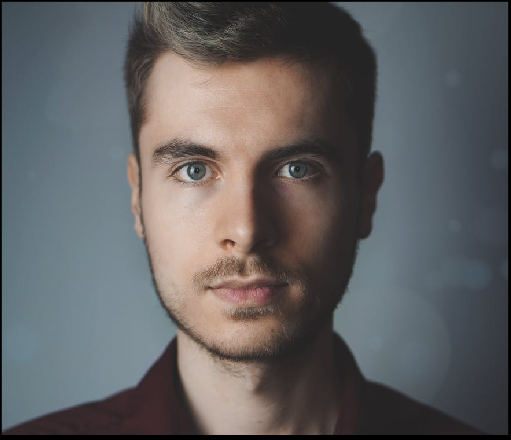



Grayscale Image


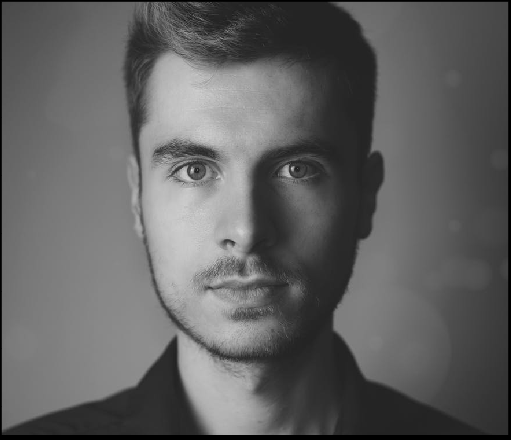

In [ ]:
# Keypoint Detection with ORB

from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt

single_face = cv2.imread("/content/drive/My Drive/Colab Notebooks/single_face.png")
print('Original Image')
cv2_imshow(single_face)

print('\n')

print('Grayscale Image')
single_face_gray_image = cv2.cvtColor(single_face, cv2.COLOR_BGR2GRAY)
cv2_imshow(single_face_gray_image)

Image with Keypoints


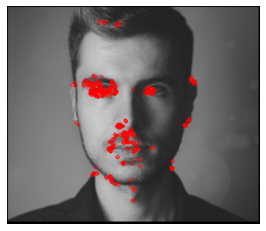

The first 20 coordinates of the Keypoins are:
[[172. 169.]
 [289. 163.]
 [192. 177.]
 [281. 176.]
 [220. 172.]
 [168. 173.]
 [175. 174.]
 [221.  40.]
 [295. 170.]
 [297. 168.]
 [286. 169.]
 [287. 165.]
 [187. 166.]
 [192. 167.]
 [195. 168.]
 [292. 168.]
 [191. 169.]
 [175. 337.]
 [187. 170.]
 [164. 157.]]


In [ ]:
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(single_face_gray_image,None)

# compute the descriptors with ORB
kp, des = orb.compute(single_face_gray_image, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(single_face_gray_image, kp, None, color=(255,0,0), flags= 2)
print("Image with Keypoints")
plt.axis("off")
plt.imshow(img2),plt.show()
print("The first 20 coordinates of the Keypoins are:")
pts = cv2.KeyPoint_convert(kp)
print(pts[:20])

Rotated by 45 degrees


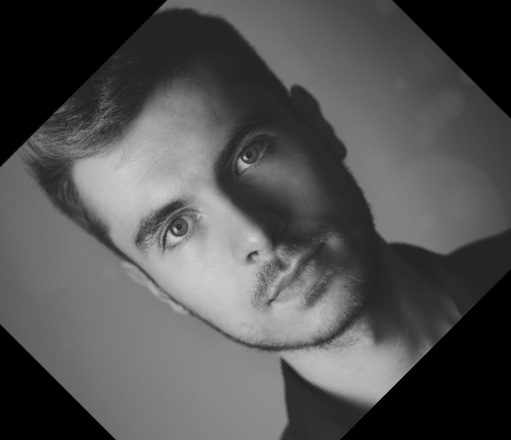

In [ ]:

(h, w) = single_face_gray_image.shape[:2]
center=(w/2,h/2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(single_face_gray_image, M, (w, h))
print("Rotated by 45 degrees")
cv2_imshow(rotated)

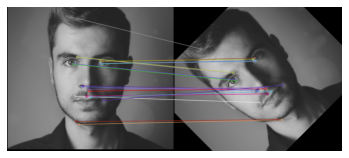

(<matplotlib.image.AxesImage at 0x7fc6b7bd3890>, None)

In [ ]:
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(single_face_gray_image,None)
kp2, des2 = orb.detectAndCompute(rotated,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 20 matches.
img3 = cv2.drawMatches(single_face_gray_image,kp1,rotated,kp2,matches[:20],None, flags=2)
plt.axis("off")
plt.imshow(img3),plt.show()

Original Image


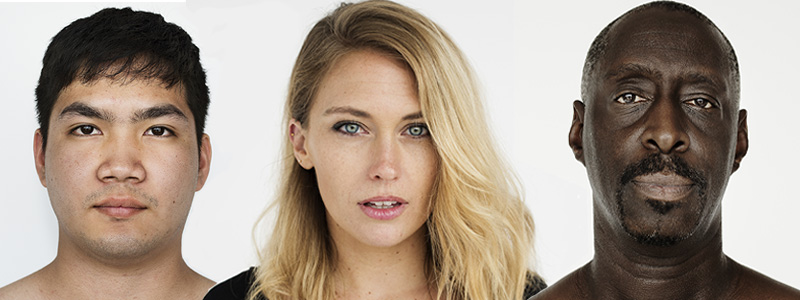



Grayscale Image


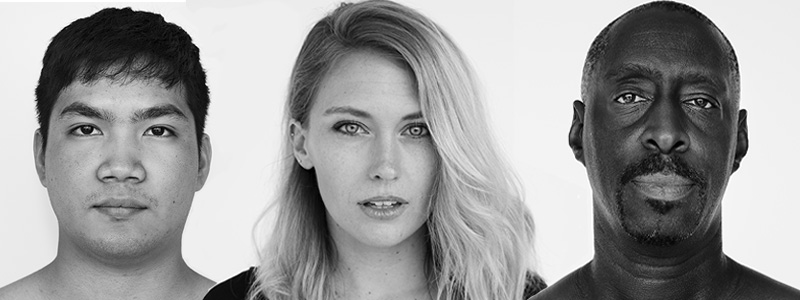

In [ ]:
# Face and Eye Detection using Haar Cascades

from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt

faces = cv2.imread("/content/drive/My Drive/Colab Notebooks/faces.jpeg")
print('Original Image')
cv2_imshow(faces)

print('\n')

print('Grayscale Image')
faces_gray = cv2.cvtColor(faces, cv2.COLOR_BGR2GRAY)
cv2_imshow(faces_gray)

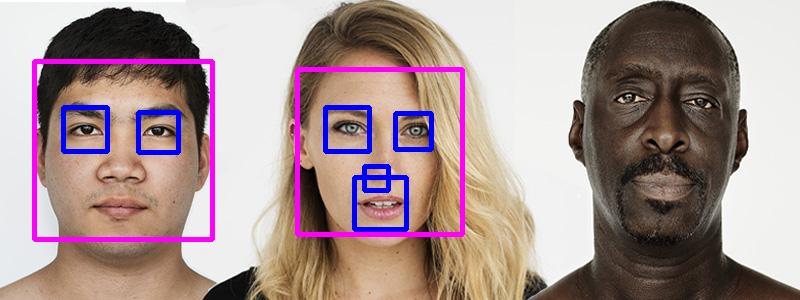

In [ ]:
from __future__ import print_function
import cv2 
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier("/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml")
eyes_cascade = cv2.CascadeClassifier("/content/drive/My Drive/Colab Notebooks/haarcascade_eye.xml")
faces = cv2.imread("/content/drive/My Drive/Colab Notebooks/faces.jpeg")

def detectAndDisplay(faces):
    faces_gray = cv2.cvtColor(faces, cv2.COLOR_BGR2GRAY)
    faces_gray = cv2.equalizeHist(faces_gray)
    #-- Detect faces
    faces_coord = face_cascade.detectMultiScale(faces_gray)
    for (x,y,w,h) in faces_coord:
        center = (x + w//2, y + h//2)
        cv2.rectangle(faces,(x,y),(x+w,y+h),(255,0,255),4)
        faceROI = faces_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes_coord = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes_coord:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            top_left_corner = x + x2 + w2//2-(radius),y + y2 + h2//2-(radius)
            bottom_right_corner = x + x2 + w2//2+(radius),y + y2 + h2//2+(radius)           
            cv2.rectangle(faces,top_left_corner,bottom_right_corner,(255,0,0),4)
    cv2_imshow(faces)

detectAndDisplay(faces)
    

The two false positives are the nose and mouth of the white woman and the 3 false negatives are the face and two eyes of the black man.

